In [ ]:
!pip install tensorflow

In [12]:
# 패키지 설치 (필요한 경우만 실행)
# !pip install tensorflow pandas scikit-learn matplotlib

# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [22]:
# 파일 경로
승하차_파일 = "../../data/결과/승하차/통합/2호선_승하차인원_통합.csv"
혼잡도_파일 = "../../data/결과/혼잡도/통합/2호선_혼잡도_통합.csv"
시간표_파일 = "../../data/결과/운행시간표/통합/2호선_열차운행시각표.csv"

# 데이터 로드
승하차_df = pd.read_csv(승하차_파일, encoding="euc-kr")
혼잡도_df = pd.read_csv(혼잡도_파일, encoding="euc-kr")
시간표_df = pd.read_csv(시간표_파일, encoding="euc-kr")

In [25]:
# --------------------------
# 분석 대상 설정
# --------------------------
target_station_code = 205  # "을지로입구" 등 원하는 역번호
target_daytype = "평일"  # '평일' 또는 '주말'
target_direction = "상행"  # '상행', '하행'
station_codes = sorted(승하차_df["역번호"].unique())

In [26]:
# --------------------------
# 시간별 분석
# --------------------------
results = []
for tcol in time_cols:
    previous_onboard = 0  # 열차가 시작할 때는 0명 탑승
    for code in station_codes:
        승차값 = 승하차_df[
            (승하차_df["역번호"] == code)
            & (승하차_df["구분"] == "승차")
            & (승하차_df["평일주말"] == target_daytype)
        ][tcol].sum()
        하차값 = 승하차_df[
            (승하차_df["역번호"] == code)
            & (승하차_df["구분"] == "하차")
            & (승하차_df["평일주말"] == target_daytype)
        ][tcol].sum()
        혼잡도값 = 혼잡도_df[
            (혼잡도_df["역번호"] == code)
            & (혼잡도_df["평일주말"] == target_daytype)
            & (혼잡도_df["구분"] == target_direction)
        ][tcol].sum()

        curr_onboard = max(0, previous_onboard + 승차값 - 하차값)

        # 혼잡도 보정
        if not pd.isna(혼잡도값) and 혼잡도값 > 0:
            if 혼잡도값 >= 150:
                curr_onboard = int(curr_onboard * 1.10)
            elif 혼잡도값 >= 130:
                curr_onboard = int(curr_onboard * 1.05)

        results.append(
            {
                "시간": tcol,
                "역번호": code,
                "승차인원": int(승차값),
                "하차인원": int(하차값),
                "혼잡도": float(혼잡도값) if not pd.isna(혼잡도값) else np.nan,
                "열차내인원_예측": curr_onboard,
            }
        )

        previous_onboard = curr_onboard  # 다음 역은 현재 인원부터 시작

In [27]:
# --------------------------
# 최종 결과 확인
# --------------------------
df_result = pd.DataFrame(results)

# 만약 특정 역번호만 출력하고 싶다면
df_filtered = df_result[df_result["역번호"] == target_station_code]
print(df_filtered)

        시간  역번호     승차인원     하차인원    혼잡도    열차내인원_예측
4     5:00  205   751895    95665   71.4    656230.0
54    6:00  205   488119   785624  184.7         0.0
104   7:00  205   732731  2383609  300.3         0.0
154   8:00  205  1140744  5683933  463.6         0.0
204   9:00  205  1165649  3294919  299.9         0.0
254  10:00  205  1160561  2588091  232.2         0.0
304  11:00  205  1400348  2357403  273.8         0.0
354  12:00  205  1637655  2205407  302.7         0.0
404  13:00  205  1794735  2345133  328.5         0.0
454  14:00  205  2069902  2285237  317.3   2896523.0
504  15:00  205  2566985  2124677  352.0   7516688.0
554  16:00  205  3165068  2025896  401.2  11785731.0
604  17:00  205  3771636  2300340  526.2  30305380.0
654  18:00  205  4765730  2853472  571.6  75359139.0
704  19:00  205  3090524  3257725  274.8  31356244.0
754  20:00  205  2250025  2115210  199.0  24582697.0
804  21:00  205  2230697  1619557  288.4  22558758.0
854  22:00  205  1910274  1316060  292.6  1545

       시간  승차인원  하차인원  혼잡도  열차내인원_예측
0    0:00     0     0  NaN         0
1    5:00     0     0  NaN         0
2    6:00     0     0  NaN         0
3    7:00     0     0  NaN         0
4    8:00     0     0  NaN         0
5    9:00     0     0  NaN         0
6   10:00     0     0  NaN         0
7   11:00     0     0  NaN         0
8   12:00     0     0  NaN         0
9   13:00     0     0  NaN         0
10  14:00     0     0  NaN         0
11  15:00     0     0  NaN         0
12  16:00     0     0  NaN         0
13  17:00     0     0  NaN         0
14  18:00     0     0  NaN         0
15  19:00     0     0  NaN         0
16  20:00     0     0  NaN         0
17  21:00     0     0  NaN         0
18  22:00     0     0  NaN         0
19  23:00     0     0  NaN         0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10660\521504567.py:17: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10660\521504567.py:17: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10660\521504567.py:17: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10660\521504567.py:17: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10660\521504567.py:17: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10660\521504567.py:17

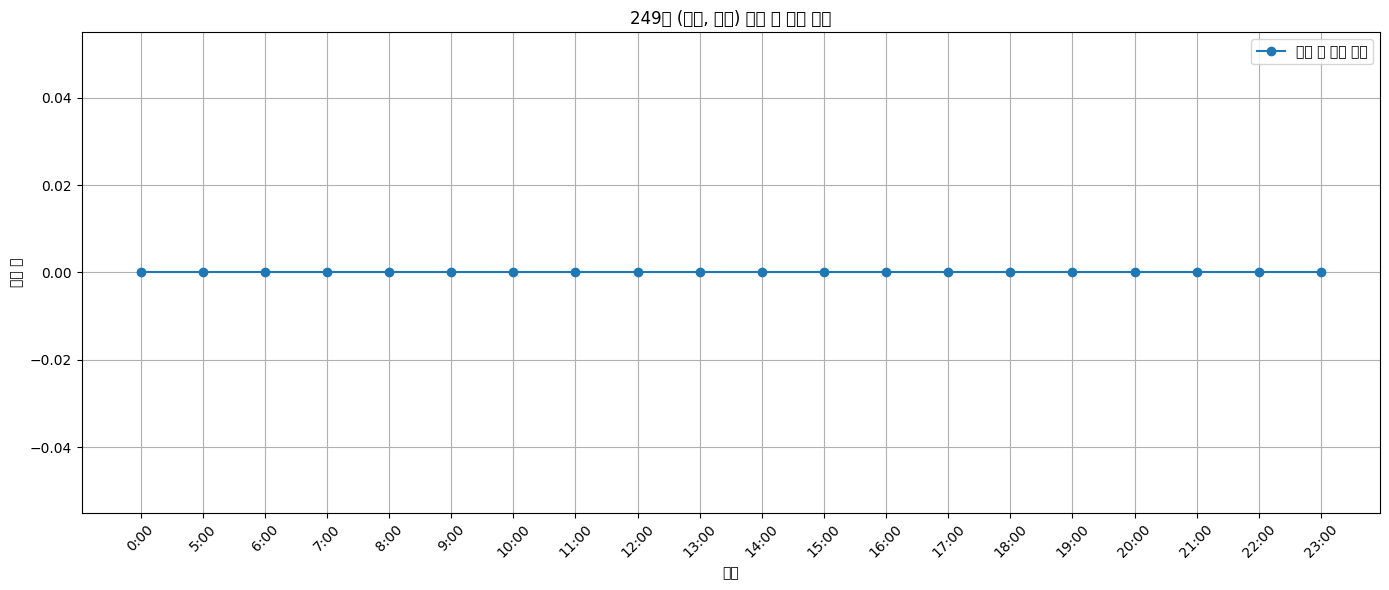

In [28]:
# 최종 결과 출력
print(final_df[["시간", "승차인원", "하차인원", "혼잡도", "열차내인원_예측"]])

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(
    final_df["시간"], final_df["열차내인원_예측"], marker="o", label="열차 내 인원 예측"
)
plt.xticks(rotation=45)
plt.xlabel("시간")
plt.ylabel("인원 수")
plt.title(
    f"{target_station}역 ({target_daytype}, {target_direction}) 열차 내 예상 인원"
)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 계산 적용
final_df = estimate_train_load(final_df)

# --------------------------
# 5. 출력 확인
# --------------------------
print(final_df[["시간", "승차인원", "하차인원", "혼잡도", "열차내인원_예측"]])